In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [19]:
# target users
target_users = ("BBCBreaking","CBSNews","CNN","FoxNews","nytimes")

results_list = []
#oldest_tweet = None
for user in target_users:
    
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    date_list = []
    channel_name = []
    counter = 0
    
    for x in range(1,6):
        public_tweets = api.user_timeline(user, page=x, result_type="recent")
        
        for tweet in public_tweets:
            date = tweet["created_at"]
        
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
                       
            #oldest_tweet = tweet['id'] - 1
            counter += 1
            results_list.append({
                "News Media": user,
                "Date": tweet["created_at"],
                "Compound": compound,
                "Positive": pos,
                "Neutral": neu,
                "Negative": neg,
                "Tweets Ago": counter,
                "Tweet":tweet["text"]})
            
            
            

In [21]:
df = pd.DataFrame(results_list)
results_df = df[["News Media","Date","Tweets Ago","Compound","Positive","Neutral","Negative","Tweet"]]
results_df.to_csv("news_media_sentiment.csv")
results_df

,News Media,Date,Tweets Ago,Compound,Positive,Neutral,Negative,Tweet
0,BBCBreaking,Sun Sep 09 18:09:57 +0000 2018,1,0.6249,0.282,0.718,0.000,Sweden's far right makes gains in election as ...
1,BBCBreaking,Sun Sep 09 17:03:42 +0000 2018,2,-0.8555,0.000,0.580,0.420,28-year-old woman charged with attempted murde...
2,BBCBreaking,Sat Sep 08 21:47:17 +0000 2018,3,0.8402,0.340,0.577,0.083,Naomi Osaka beats Serena Williams 6-2 6-4 to w...
3,BBCBreaking,Sat Sep 08 17:02:27 +0000 2018,4,-0.9231,0.000,0.530,0.470,"Woman, 28, arrested after man stabbed in Barns..."
4,BBCBreaking,Sat Sep 08 09:38:43 +0000 2018,5,-0.7184,0.000,0.760,0.240,One person arrested after reports man had been...
5,BBCBreaking,Sat Sep 08 09:10:30 +0000 2018,6,-0.0772,0.000,0.902,0.098,"Police responding to ""serious incident"" in Bar..."
6,BBCBreaking,Fri Sep 07 21:28:58 +0000 2018,7,-0.6486,0.000,0.815,0.185,US rapper Mac Miller found dead at his Los Ang...
7,BBCBreaking,Fri Sep 07 20:45:14 +0000 2018,8,-0.7650,0.000,0.720,0.280,Former Donald Trump aide George Papadopoulos j...
8,BBCBreaking,Fri Sep 07 07:00:15 +0000 2018,9,-0.7871,0.140,0.433,0.427,"BA boss ""extremely sorry"" after some customers..."
9,BBCBreaking,Thu Sep 06 20:55:50 +0000 2018,10,-0.8225,0.000,0.612,0.388,Twitter permanently bans US conspiracy theoris...


In [13]:
bbc = results_df.loc[results_df["News Media"] == "BBCBreaking",:]
bbc_x = bbc["Tweets Ago"]
bbc_y = bbc["Compound"]

cbs = results_df.loc[results_df["News Media"] == "CBSNews",:]
cbs_x = cbs["Tweets Ago"]
cbs_y = cbs["Compound"]

cnn = results_df.loc[results_df["News Media"] == "CNN",:]
cnn_x = cnn["Tweets Ago"]
cnn_y = cnn["Compound"]

fox = results_df.loc[results_df["News Media"] == "FoxNews",:]
fox_x = cbs["Tweets Ago"]
fox_y = cbs["Compound"]

nytimes = results_df.loc[results_df["News Media"] == "nytimes",:]
nytimes_x = cbs["Tweets Ago"]
nytimes_y = cbs["Compound"]




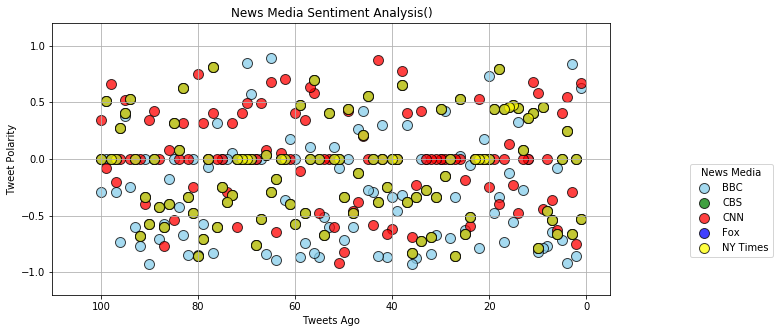

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(bbc_x,bbc_y, c="skyblue", label="BBC", edgecolor="black",s=100,alpha=0.75)
plt.scatter(cbs_x,cbs_y, c="green", label="CBS", edgecolor="black",s=100,alpha=0.75)
plt.scatter(cnn_x,cnn_y, c="red", label="CNN", edgecolor="black",s=100,alpha=0.75)
plt.scatter(fox_x,fox_y, c="blue", label="Fox", edgecolor="black",s=100,alpha=0.75)
plt.scatter(nytimes_x,nytimes_y, c="yellow", label="NY Times", edgecolor="black",s=100,alpha=0.75)


plt.title(f"News Media Sentiment Analysis()")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim(110,-5,20)
plt.ylim(-1.2,1.2,0.5)

plt.grid(True)
plt.legend( bbox_to_anchor=[1.3, 0.5], title="News Media")


plt.show()


In [ ]:
cbs.head()

In [ ]:
nytimes.head()